In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', 50)

In [2]:
data=pd.read_excel('edited final.xlsx',parse_dates=['case_received_date','decision_date'])

In [3]:
data.head()

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay
0,NaN,PERM,A-07323-97014,NaT,Certified,J-1,ARMENIA,2012-02-01,NaN,NaN,NEW YORK,NETSOFT USA INC.,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,75629.00,Level II,OES,IT,75629,yr
1,NaN,PERM,A-07332-99439,NaT,Denied,B-2,POLAND,2011-12-21,NaN,NaN,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,37024.00,Level I,OES,Other Economic Sector,37024,yr
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,NaN,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,NaN,NaN,NaN,NaN,NaN,MD,yr,47923.00,Level I,OES,Aerospace,47923,yr
3,NaN,PERM,A-07339-01930,NaT,Certified,B-2,SOUTH KOREA,2011-12-01,NaN,NaN,FLUSHING,EBENEZER MISSION CHURCH,NY,NaN,NaN,NaN,NaN,NaN,NY,hr,10.97,Level II,OES,Other Economic Sector,10.97,hr
4,NaN,PERM,A-07345-03565,NaT,Certified,L-1,CANADA,2012-01-26,NaN,NaN,ALBANY,ALBANY INTERNATIONAL CORP.,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,94890.00,Level IV,OES,Advanced Mfg,100000,yr


In [4]:
print('info',data.info())
print('Shape==',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 26 columns):
agent_state                      208239 non-null object
application_type                 135269 non-null object
case_no                          135269 non-null object
case_received_date               239091 non-null datetime64[ns]
case_status                      374362 non-null object
class_of_admission               351517 non-null object
country_of_citizenship           374302 non-null object
decision_date                    374362 non-null datetime64[ns]
employer_num_employees           239013 non-null float64
employer_yr_estab                238958 non-null float64
employer_city                    374348 non-null object
employer_name                    374350 non-null object
employer_state                   374320 non-null object
foreign_worker_info_education    239053 non-null object
foreign_worker_info_major        219390 non-null object
job_experience                 

In [5]:
data.drop_duplicates(inplace=True) 

In [6]:
data.shape

(365627, 26)

### Extracting month and year  from Dates
1. The first 2 numbers in the case_no follow a pattern and depict the year .
2. It has been observed that in each record , either the case_no is available or the case_received_date
3. We will hence extract the year from case_no and impute the case_received_date_year column for its missing values

In [7]:
## We have two date columns:-- case_received_date and decision_date so convert date into month and year and try to get some infernces from that.

data['case_received_date_year']=data.case_received_date.dt.year

data['decision_date_year']=data.decision_date.dt.year

In [8]:
def missing_check(df):                                    #method-01
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/len(df)).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])    #only for print heading
    return missing_data


missing_check(data)          #recall fun

,Total,Percent
sector,236559,0.646995
application_type,230358,0.630036
case_no,230358,0.630036
agent_state,161157,0.440769
foreign_worker_info_major,151662,0.414800
employer_yr_estab,135404,0.370334
employer_num_employees,135349,0.370183
job_title,135313,0.370085
foreign_worker_info_education,135308,0.370071
job_training,135284,0.370005


In [9]:
print('null values==',data.isnull().sum()[data.isnull().sum()!=0])

null values== agent_state                      161157
application_type                 230358
case_no                          230358
case_received_date               135271
class_of_admission                21021
country_of_citizenship               60
employer_num_employees           135349
employer_yr_estab                135404
employer_city                        14
employer_name                        12
employer_state                       42
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
job_work_state                      103
pv_unit_of_pay_9089                9630
previous_salary                    2214
level                             27095
source_name                        2097
sector                           236559
wage_offer                       114771
wage_unit_of_pay                 115689
case_received_date_year   

In [10]:
(data.isnull().sum()[data.isna().sum()!=0])*100/365627

agent_state                      44.076887
application_type                 63.003553
case_no                          63.003553
case_received_date               36.996994
class_of_admission                5.749302
country_of_citizenship            0.016410
employer_num_employees           37.018327
employer_yr_estab                37.033370
employer_city                     0.003829
employer_name                     0.003282
employer_state                    0.011487
foreign_worker_info_education    37.007114
foreign_worker_info_major        41.479978
job_experience                   36.999729
job_title                        37.008481
job_training                     37.000550
job_work_state                    0.028171
pv_unit_of_pay_9089               2.633832
previous_salary                   0.605535
level                             7.410558
source_name                       0.573535
sector                           64.699544
wage_offer                       31.390187
wage_unit_o

### Extract year as we got pattern from case_no and impute it into feature

In [11]:
raw=data.case_no[data.case_no.notnull()]
year=raw.transform(lambda x:x.split("-")[1])
data['Yr']='20'+year
data['Yr'].head()

0    2007323
1    2007332
2    2007333
3    2007339
4    2007345
Name: Yr, dtype: object

In [12]:
y=data['Yr'].astype('str')
new=[]
for i in y.index:
    new.append(y[i][:-3])
    
new[1]

'2007'

In [13]:
data['Received_Year']=new

data.drop('Yr',axis=1,inplace=True)

data.case_received_date_year.fillna(data.Received_Year,inplace=True)



data.decision_date_year=data.decision_date_year.astype('int')
data.head()

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year
0,NaN,PERM,A-07323-97014,NaT,Certified,J-1,ARMENIA,2012-02-01,NaN,NaN,NEW YORK,NETSOFT USA INC.,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,75629.00,Level II,OES,IT,75629,yr,2007,2012,2007
1,NaN,PERM,A-07332-99439,NaT,Denied,B-2,POLAND,2011-12-21,NaN,NaN,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,37024.00,Level I,OES,Other Economic Sector,37024,yr,2007,2011,2007
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,NaN,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,NaN,NaN,NaN,NaN,NaN,MD,yr,47923.00,Level I,OES,Aerospace,47923,yr,2007,2011,2007
3,NaN,PERM,A-07339-01930,NaT,Certified,B-2,SOUTH KOREA,2011-12-01,NaN,NaN,FLUSHING,EBENEZER MISSION CHURCH,NY,NaN,NaN,NaN,NaN,NaN,NY,hr,10.97,Level II,OES,Other Economic Sector,10.97,hr,2007,2011,2007
4,NaN,PERM,A-07345-03565,NaT,Certified,L-1,CANADA,2012-01-26,NaN,NaN,ALBANY,ALBANY INTERNATIONAL CORP.,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,94890.00,Level IV,OES,Advanced Mfg,100000,yr,2007,2012,2007


In [14]:
data.case_received_date_year.unique()

array(['2007', '2008', '2006', '2009', '2011', '2010', '2012', '2013',
       '2005', '2014', 2013.0, 2014.0, 2009.0, 2010.0, 2008.0, 2012.0,
       2015.0, 2006.0, 2007.0, 2011.0, '', 2016.0], dtype=object)

In [15]:
data[data.case_received_date_year=='']

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year
188375,FLORIDA,NaN,NaN,NaT,Withdrawn,H-1B,CHILE,2014-12-04,88.0,1999.0,COCONUT GROVE,TRAX USA CORP.,FLORIDA,Bachelor's,MANAGEMENT OF TECHNICAL OPERATIONS,Y,Functional Software Specialist,N,FLORIDA,Year,96325.0,Level IV,OES,NaN,96325,Year,,2014,
198698,CALIFORNIA,NaN,NaN,NaT,Withdrawn,H-1B,BRAZIL,2015-03-06,30000.0,1998.0,NEW YORK,PRICEWATERHOUSECOOPERS,NEW YORK,Master's,BUSINESS ADMINISTRATION (GRADUATED: 05/20/2012),Y,Senior Associate,N,NEW YORK,Year,132558.0,Level IV,OES,NaN,132558,Year,,2015,


In [16]:
data.case_received_date_year.replace("",1996,inplace=True) #1996 is the mode

In [17]:
data.case_received_date_year=data.case_received_date_year.astype('int')

In [18]:
data[data.case_received_date_year>data.decision_date_year]   # This imputation is succesful

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year


In [19]:
data.employer_yr_estab.isnull().sum()

135404

### Inferences :
1. We have extracted useful data from case_no (63% missing values) and case_received_date (37% missing values) , so now we will drop them.

2. The new extracted features: case_received_date_mn nad decision_date_mn are not contributing to be helpful and moreover have missing values , so we have dropped them.


In [20]:
data.employer_yr_estab.median()

1996.0

### Binning the years 

In [21]:
pd.qcut(data.employer_yr_estab,3)

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5                      NaN
6                      NaN
7                      NaN
8                      NaN
9                      NaN
10                     NaN
11                     NaN
12                     NaN
13                     NaN
14                     NaN
15                     NaN
16                     NaN
17                     NaN
18                     NaN
19                     NaN
20                     NaN
21                     NaN
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26                     NaN
27                     NaN
28                     NaN
29                     NaN
                ...       
374332    (-0.001, 1988.0]
374333    (2001.0, 2016.0]
374334    (2001.0, 2016.0]
374335    (1988.0, 2001.0]
374336    (2001.0, 2016.0]
374337    (-0.001, 1988.0]
3

In [22]:
data.employer_yr_estab.fillna(-1,inplace=True)  # Keeping the null values aside

In [23]:
def age(x):
    if x==-1:
        return "Unavailable"
    elif x>-1 and x<1600:
        return "Old"
    elif x>1988 and x<2001:
        return 'Old'
    elif x<1988:
        return "Ancient"
    else:
        return "New"
    
data.employer_yr_estab=data.employer_yr_estab.apply(age)

In [24]:
data.employer_yr_estab.value_counts(1)

Unavailable    0.370334
New            0.228637
Ancient        0.207824
Old            0.193205
Name: employer_yr_estab, dtype: float64

In [25]:
data.head()

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year
0,NaN,PERM,A-07323-97014,NaT,Certified,J-1,ARMENIA,2012-02-01,NaN,Unavailable,NEW YORK,NETSOFT USA INC.,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,75629.00,Level II,OES,IT,75629,yr,2007,2012,2007
1,NaN,PERM,A-07332-99439,NaT,Denied,B-2,POLAND,2011-12-21,NaN,Unavailable,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,37024.00,Level I,OES,Other Economic Sector,37024,yr,2007,2011,2007
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,Unavailable,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,NaN,NaN,NaN,NaN,NaN,MD,yr,47923.00,Level I,OES,Aerospace,47923,yr,2007,2011,2007
3,NaN,PERM,A-07339-01930,NaT,Certified,B-2,SOUTH KOREA,2011-12-01,NaN,Unavailable,FLUSHING,EBENEZER MISSION CHURCH,NY,NaN,NaN,NaN,NaN,NaN,NY,hr,10.97,Level II,OES,Other Economic Sector,10.97,hr,2007,2011,2007
4,NaN,PERM,A-07345-03565,NaT,Certified,L-1,CANADA,2012-01-26,NaN,Unavailable,ALBANY,ALBANY INTERNATIONAL CORP.,NY,NaN,NaN,NaN,NaN,NaN,NY,yr,94890.00,Level IV,OES,Advanced Mfg,100000,yr,2007,2012,2007


In [26]:
data.shape

(365627, 29)

### Correcting the values of units of pay

In [27]:
data.pv_unit_of_pay_9089.replace('yr','Year',inplace=True)
data.pv_unit_of_pay_9089.replace('hr','Hour',inplace=True)
data.pv_unit_of_pay_9089.replace('bi','Bi-Weekly',inplace=True)
data.pv_unit_of_pay_9089.replace('mth','Month',inplace=True)
data.pv_unit_of_pay_9089.replace('wk','Week',inplace=True)

data.wage_unit_of_pay.replace('hr','Hour',inplace=True)
data.wage_unit_of_pay.replace('bi','Bi-Weekly',inplace=True)
data.wage_unit_of_pay.replace('mth','Month',inplace=True)
data.wage_unit_of_pay.replace('wk','Week',inplace=True)
data.wage_unit_of_pay.replace('yr','Year',inplace=True)

data.pv_unit_of_pay_9089.unique(),data.wage_unit_of_pay.unique()

(array(['Year', 'Hour', nan, 'Bi-Weekly', 'Month', 'Week'], dtype=object),
 array(['Year', 'Hour', 'Month', 'Week', 'Bi-Weekly', nan], dtype=object))

### Analyzing columns like states to generalize them

In [28]:
data.agent_state.unique()

array([nan, 'WISCONSIN', 'NORTH CAROLINA', 'COLORADO', 'CALIFORNIA',
       'MICHIGAN', 'NEW YORK', 'TEXAS', 'PENNSYLVANIA', 'NEW JERSEY',
       'MISSOURI', 'FLORIDA', 'VIRGINIA', 'OHIO', 'DISTRICT OF COLUMBIA',
       'INDIANA', 'GEORGIA', 'MASSACHUSETTS', 'ILLINOIS', 'ALABAMA',
       'OKLAHOMA', 'WASHINGTON', 'CONNECTICUT', 'MINNESOTA', 'ARKANSAS',
       'HAWAII', 'MARYLAND', 'UTAH', 'PUERTO RICO', 'ARIZONA', 'NEVADA',
       'NEW HAMPSHIRE', 'OREGON', 'KANSAS', 'NEW MEXICO', 'VERMONT',
       'TENNESSEE', 'NEBRASKA', 'LOUISIANA', 'KENTUCKY', 'GUAM', 'IOWA',
       'SOUTH CAROLINA', 'RHODE ISLAND', 'MAINE', 'IDAHO', 'NORTH DAKOTA',
       'ALASKA', 'MISSISSIPPI', 'DELAWARE', 'MARSHALL ISLANDS',
       'SOUTH DAKOTA', 'MONTANA', 'WEST VIRGINIA', 'NE', 'FL', 'TX', 'CA',
       'NY', 'GA', 'MA', 'DC', 'IL', 'VA', 'NC', 'MD', 'TN', 'LA', 'NJ',
       'HI', 'PA', 'MI', 'MO', 'WI', 'OK', 'AZ', 'OR', 'MN', 'OH', 'CT',
       'UT', 'SC', 'AL', 'WA', 'IN', 'NH', 'CO', 'VT', 'IA', 'RI', 'ME

In [29]:
data.agent_state.value_counts().head(),data.agent_state.value_counts(1).head()

(CA            34824
 CALIFORNIA    19597
 NY            16143
 TX            10707
 NEW YORK       9354
 Name: agent_state, dtype: int64, CA            0.170313
 CALIFORNIA    0.095843
 NY            0.078950
 TX            0.052365
 NEW YORK      0.045748
 Name: agent_state, dtype: float64)

##### Inference:
1. Since, agent_state has 58 unique values, 44% nan values and it is not contributing significantly to the business problem. 

2. Moreover , similar information is available in 'Source' column.

In [30]:
#2
data.application_type.value_counts()

ONLINE      112564
PERM         20576
MAILEDIN      2129
Name: application_type, dtype: int64

In [31]:
data.application_type.unique()

array(['PERM', 'ONLINE', 'MAILEDIN', nan], dtype=object)

In [32]:
112564+20576+2129

135269

In [33]:
365627-135269

230358

In [34]:
230358/3

76786.0

#### Creating a new level for missing values 

In [35]:
data.application_type.fillna("ONLINE", limit=76786,inplace=True)  
data.application_type.fillna("PERM", limit=76786,inplace=True)
data.application_type.fillna("MAILEDIN", limit=76786,inplace=True)

In [36]:
#d.dropna(thresh=11,inplace=True)

In [37]:
data.isnull().sum()/data.shape[0]

agent_state                      0.440769
application_type                 0.000000
case_no                          0.630036
case_received_date               0.369970
case_status                      0.000000
class_of_admission               0.057493
country_of_citizenship           0.000164
decision_date                    0.000000
employer_num_employees           0.370183
employer_yr_estab                0.000000
employer_city                    0.000038
employer_name                    0.000033
employer_state                   0.000115
foreign_worker_info_education    0.370071
foreign_worker_info_major        0.414800
job_experience                   0.369997
job_title                        0.370085
job_training                     0.370005
job_work_state                   0.000282
pv_unit_of_pay_9089              0.026338
previous_salary                  0.006055
level                            0.074106
source_name                      0.005735
sector                           0

### Imputing Missing values in columns less with than 2% missing values

In [38]:
data.source_name.fillna(data.source_name.mode()[0],inplace=True)
data.previous_salary.fillna(data.previous_salary.median(),inplace=True)
data.job_work_state.fillna(data.job_work_state.mode()[0],inplace=True)
data.country_of_citizenship.fillna(data.country_of_citizenship.mode()[0],inplace=True)
data.employer_city.fillna(data.employer_city.mode()[0],inplace=True)
data.employer_name.fillna(data.employer_name.mode()[0],inplace=True)
#d.employer_name.fillna(d.employer_name.mode()[0],inplace=True)
#d.employer_state.fillna(d.employer_state.mode()[0],inplace=True)


data.isnull().sum()[data.isnull().sum()!=0]

agent_state                      161157
case_no                          230358
case_received_date               135271
class_of_admission                21021
employer_num_employees           135349
employer_state                       42
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
pv_unit_of_pay_9089                9630
level                             27095
sector                           236559
wage_offer                       114771
wage_unit_of_pay                 115689
dtype: int64

### Generalizing the Class_of_admsn of Visa

In [39]:
data.class_of_admission.unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', nan, 'E-1', 'H-2B',
       'TPS', 'F-1', 'B-1', 'C-1', 'Not in USA', 'TN', 'H-4', 'O-1',
       'R-1', 'L-2', 'Q', 'F-2', 'H-1B1', 'Parolee', 'G-5', 'E-3', 'H-2A',
       'VWT', 'P-1', 'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2',
       'P-4', 'I', 'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3',
       'Parol', 'O-2', 'H1B', 'N', 'T-1', 'TD', 'M-1', 'K-1', 'U-1',
       'AOS', 'P-2', 'C-3', 'V-2', 'M-2'], dtype=object)

Visa categories are further divided into sub-categories. So we can use the parent Category in order to generalize it. 

https://www.bankbazaar.com/visa/types-of-us-visa.html

https://uk.usembassy.gov/visas/visa-directory/

https://travel.state.gov/content/travel/en/us-visas/visa-information-resources/all-visa-categories.html

In [40]:
data.class_of_admission.replace('J-1','J',inplace=True)
data.class_of_admission.replace('J-2','J',inplace=True)
data.class_of_admission.replace('B-2','B',inplace=True)
data.class_of_admission.replace('B-1','B',inplace=True)
data.class_of_admission.replace('H-2B','H-1B',inplace=True)
data.class_of_admission.replace('H-2A','H-1B',inplace=True)
data.class_of_admission.replace('H-1A','H-1B',inplace=True)
data.class_of_admission.replace('H-1B1','H-1B',inplace=True)
data.class_of_admission.replace('H-3','H-1B',inplace=True)
data.class_of_admission.replace('H-4','H-1B',inplace=True)
data.class_of_admission.replace('H-1C','H-1B',inplace=True)
data.class_of_admission.replace('H1B','H-1B',inplace=True)
data.class_of_admission.replace('L-1','L',inplace=True)
data.class_of_admission.replace('L-2','L',inplace=True)
data.class_of_admission.replace('Parol','Parole',inplace=True)
data.class_of_admission.replace('Parolee','Parole',inplace=True)
data.class_of_admission.replace('E-1','E',inplace=True)
data.class_of_admission.replace('E-2','E',inplace=True)
data.class_of_admission.replace('E-3','E',inplace=True)
data.class_of_admission.replace('F-1','F',inplace=True)
data.class_of_admission.replace('F-2','F',inplace=True)
data.class_of_admission.replace('G-1','G',inplace=True)
data.class_of_admission.replace('G-4','G',inplace=True)
data.class_of_admission.replace('G-5','G',inplace=True)
data.class_of_admission.replace('M-1','M',inplace=True)
data.class_of_admission.replace('M-2','M',inplace=True)
data.class_of_admission.replace('O-1','O',inplace=True)
data.class_of_admission.replace('O-2','O',inplace=True)
data.class_of_admission.replace('O-3','O',inplace=True)
data.class_of_admission.replace('P-1','P',inplace=True)
data.class_of_admission.replace('P-2','P',inplace=True)
data.class_of_admission.replace('P-3','P',inplace=True)
data.class_of_admission.replace('P-4','P',inplace=True)
data.class_of_admission.replace('R-1','R',inplace=True)
data.class_of_admission.replace('R-2','R',inplace=True)
data.class_of_admission.replace('C-1','C',inplace=True)
data.class_of_admission.replace('C-2','C',inplace=True)
data.class_of_admission.replace('C-3','C',inplace=True)
data.class_of_admission.replace('A1/A2','A',inplace=True)
data.class_of_admission.replace('A-2','A',inplace=True)
data.class_of_admission.replace('A-3','P',inplace=True)
data.class_of_admission.replace('AOS/H-1B','AOS',inplace=True)

## Creating a new level for missing values(5%)
data.class_of_admission.replace('Not in USA','Unavailable',inplace=True)
data.class_of_admission.replace(np.nan,'Unavailable',inplace=True)

In [41]:
data.class_of_admission.unique()

array(['J', 'B', 'H-1B', 'L', 'EWI', 'E', 'Unavailable', 'TPS', 'F', 'C',
       'TN', 'O', 'R', 'Q', 'Parole', 'G', 'VWT', 'P', 'A', 'D-1', 'I',
       'VWB', 'AOS', 'N', 'T-1', 'TD', 'M', 'K-1', 'U-1', 'V-2'],
      dtype=object)

In [42]:
(data.isnull().sum()[data.isnull().sum()/data.shape[0]>0])

agent_state                      161157
case_no                          230358
case_received_date               135271
employer_num_employees           135349
employer_state                       42
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
pv_unit_of_pay_9089                9630
level                             27095
sector                           236559
wage_offer                       114771
wage_unit_of_pay                 115689
dtype: int64

In [43]:
239006/data.shape[0]
# 65.3% rows have same pv_unit_of_pay and wage_unit_of_pay

0.6536880482021294

In [44]:
data.pv_unit_of_pay_9089.unique()

array(['Year', 'Hour', nan, 'Bi-Weekly', 'Month', 'Week'], dtype=object)

In [45]:
data.pv_unit_of_pay_9089.fillna('Year',inplace=True)

In [46]:
data.pv_unit_of_pay_9089.isnull().sum()

0

________________________________________________________________
### According the work permit in US , an average person works for 8 hours a day and 5 days in a week.
#### Considering this, we can convert the unit of pay on a yearly basis so that all values of pv_unit_of_pay are same.
#### We will now convert the units: 
1. No. of working days in a year are approximately around 250 (~ = 365-(52*2))
2. https://www.opm.gov/policy-data-oversight/pay-leave/pay-administration/fact-sheets/computing-hourly-rates-of-pay-using-the-2087-hour-divisor/
3. 
Hourly and biweekly rates of pay for most Federal civilian employees are computed as required by 5 U.S.C. 5504(b). 

Hourly and Bi-weekly conversion - https://www.law.cornell.edu/uscode/text/5/5504

In [47]:
for unit in data.pv_unit_of_pay_9089.unique():
    if unit == "Hour":
        data.loc[data['pv_unit_of_pay_9089'] == unit, 'previous_salary'] = data['previous_salary'].apply(lambda x: float(x) * 8 * 250)
        data.loc[data['pv_unit_of_pay_9089'] == unit, 'pv_unit_of_pay_9089'] = data['pv_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "Week":
        data.loc[data['pv_unit_of_pay_9089'] == unit, 'previous_salary'] = data['previous_salary'].apply(lambda x: float(x) * 50)
        data.loc[data['pv_unit_of_pay_9089'] == unit, 'pv_unit_of_pay_9089'] = data['pv_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "Month":
        data.loc[data['pv_unit_of_pay_9089'] == unit, 'previous_salary'] = data['previous_salary'].apply(lambda x: float(x) * 12)
        data.loc[data['pv_unit_of_pay_9089'] == unit, 'pv_unit_of_pay_9089'] = data['pv_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "Bi-Weekly":  
        data.loc[data['pv_unit_of_pay_9089'] == unit, 'previous_salary'] = data['previous_salary'].apply(lambda x: float(x) * 40)
        data.loc[data['pv_unit_of_pay_9089'] == unit, 'pv_unit_of_pay_9089'] = data['pv_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    
    else:
        continue
        data['previous_salary'] = data.previous_salary.astype(float)


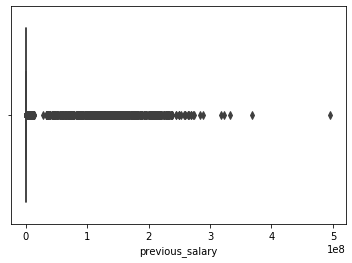

In [48]:
sns.boxplot(data.previous_salary)
plt.show()

In [49]:
data.wage_offer.fillna(data.previous_salary,inplace=True)

In [50]:
data.employer_state.mode()

0    CALIFORNIA
dtype: object

In [51]:
data.employer_state.fillna('CALIFORNIA',inplace=True)

In [52]:
data.isnull().sum()[data.isna().sum()!=0]

agent_state                      161157
case_no                          230358
case_received_date               135271
employer_num_employees           135349
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
level                             27095
sector                           236559
wage_unit_of_pay                 115689
dtype: int64

In [53]:
np.dtype(data.previous_salary)

dtype('float64')

In [54]:
data.previous_salary.median()


86501.0

In [55]:
data[data.wage_offer=="#############"]

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year
202865,CALIFORNIA,ONLINE,NaN,2015-01-14,Certified,H-1B,INDIA,2015-08-18,596.0,New,Jersey City,"Brillio, LLC",NEW JERSEY,Master's,CIVIL ENGINEERING,Y,Computer Programmer II,N,NEW JERSEY,Year,108763.0,Level III,OES,NaN,#############,Year,2015,2015,
209472,NEW YORK,ONLINE,NaN,2015-07-13,Withdrawn,E,AUSTRALIA,2015-08-05,55.0,Old,Tuxedo Park,"Live Technology Holdings, Inc.",NEW YORK,Master's,COMPUTER SCIENCE,Y,Lead Delphi Engineer,N,NEVADA,Year,7036600.0,Level II,OES,NaN,#############,Year,2015,2015,


In [56]:
data.wage_offer.replace("#############",90000,inplace=True)   #90000 is the median of this column

In [57]:
data["wage_offer"][data["wage_offer"]=="#############"]

Series([], Name: wage_offer, dtype: float64)

### The columns previous_salary and wage_offer is the same for more than 95% of the rows. 
#### They are providing the same information. Thus ,we will make a new column which is their mean and drop the original columns after extracting information from them.

In [58]:
data['meansal']=(data.previous_salary+data.wage_offer)/2



data.head()

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year,meansal
0,NaN,PERM,A-07323-97014,NaT,Certified,J,ARMENIA,2012-02-01,NaN,Unavailable,NEW YORK,NETSOFT USA INC.,NY,NaN,NaN,NaN,NaN,NaN,NY,Year,75629.0,Level II,OES,IT,75629.00,Year,2007,2012,2007,75629.000
1,NaN,PERM,A-07332-99439,NaT,Denied,B,POLAND,2011-12-21,NaN,Unavailable,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,NaN,NaN,NaN,NaN,NaN,NY,Year,37024.0,Level I,OES,Other Economic Sector,37024.00,Year,2007,2011,2007,37024.000
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,Unavailable,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,NaN,NaN,NaN,NaN,NaN,MD,Year,47923.0,Level I,OES,Aerospace,47923.00,Year,2007,2011,2007,47923.000
3,NaN,PERM,A-07339-01930,NaT,Certified,B,SOUTH KOREA,2011-12-01,NaN,Unavailable,FLUSHING,EBENEZER MISSION CHURCH,NY,NaN,NaN,NaN,NaN,NaN,NY,Year,21940.0,Level II,OES,Other Economic Sector,10.97,Hour,2007,2011,2007,10975.485
4,NaN,PERM,A-07345-03565,NaT,Certified,L,CANADA,2012-01-26,NaN,Unavailable,ALBANY,ALBANY INTERNATIONAL CORP.,NY,NaN,NaN,NaN,NaN,NaN,NY,Year,94890.0,Level IV,OES,Advanced Mfg,100000.00,Year,2007,2012,2007,97445.000


In [59]:
state_abb = { 'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
                 'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
                  'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
                'Maine': 'ME','Maryland': 'MD', 'Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
                'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ',
                'New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK',
                'Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD',
                'Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA',
                'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY','Northern Mariana Islands':'MP', 'Palau': 'PW', 
                'Puerto Rico': 'PR', 'Virgin Islands': 'VI', 'District of Columbia': 'DC','MARSHALL ISLANDS':'MH'}


us_state_abbrev = {k.upper(): v for k, v in state_abb.items()}
data['employer_state'].replace(us_state_abbrev, inplace=True)
data.employer_state = data.employer_state.astype(str)

data.employer_state.unique()

array(['NY', 'VA', 'FL', 'DE', 'MD', 'NJ', 'GA', 'IL', 'TX', 'KY', 'WY',
       'OH', 'MS', 'MA', 'NC', 'CA', 'MO', 'CT', 'AZ', 'WI', 'PA', 'WA',
       'CO', 'MN', 'NV', 'UT', 'AL', 'OK', 'LA', 'RI', 'DC', 'OR', 'MI',
       'IA', 'NH', 'IN', 'SD', 'NE', 'KS', 'TN', 'PR', 'AR', 'GU', 'WV',
       'SC', 'ID', 'VI', 'ND', 'HI', 'VT', 'ME', 'NM', 'MP', 'AK', 'MT',
       'GUAM', 'MH', 'BRITISH COLUMBIA', 'BC'], dtype=object)

### Generalizing the states

In [60]:
regions = {
    'ME':'Northeast', 
    'NY':'Northeast', 
    'NJ':'Northeast', 
    'VT':'Northeast',
    'MA':'Northeast',
    'RI':'Northeast',
    'CT':'Northeast',
    'NH':'Northeast',
    'PA':'Northeast',
     'DC':'Other',
    'IL':'Midwest',
    'IN':'Midwest',
    'IA':'Midwest', 
    'KS':'Midwest',
    'MI':'Midwest', 
    'MN':'Midwest', 
    'MO':'Midwest', 
    'NE':'Midwest',
    'ND':'Midwest', 
    'OH':'Midwest', 
    'SD':'Midwest', 
    'WI':'Midwest',
    'DE':'South',
    'FL':'South', 
    'GA':'South',
    'MD':'South',
    'NC':'South',
    'SC':'South',
    'VA':'South',
    'WV':'South',
    'AL':'South',
    'KY':'South',
    'MS':'South',
    'TN':'South',
    'AR':'South',
    'LA':'South', 
    'OK':'South',
    'TX':'South',
    'MT':'West',
    'WY':'West', 
    'CO':'West', 
    'NM':'West', 
    'ID':'West', 
    'UT':'West', 
    'AZ':'West', 
    'NV':'West',
    'WA':'West', 
    'OR':'West', 
    'CA':'West', 
    'AK':'West',
    'HI':'West', 
    'GUAM':'Island',
    'GU':'Island',
    'PR':'Island', 
    'MP':'Island', 
    'VI':'Island',
    'BC':'Northeast',
    'BRITISH COLUMBIA':'Northeast',  
    'nan':'Other',
    'FEDERATED STATES OF MICRONESIA':'Other',
'MH':'Island'}

In [61]:
def region(x):
    return regions[x]

data['employer_region'] = data['employer_state'].apply(region)


In [62]:
data.employer_region.unique()

array(['Northeast', 'South', 'Midwest', 'West', 'Other', 'Island'],
      dtype=object)

In [63]:
data.head()

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year,meansal,employer_region
0,NaN,PERM,A-07323-97014,NaT,Certified,J,ARMENIA,2012-02-01,NaN,Unavailable,NEW YORK,NETSOFT USA INC.,NY,NaN,NaN,NaN,NaN,NaN,NY,Year,75629.0,Level II,OES,IT,75629.00,Year,2007,2012,2007,75629.000,Northeast
1,NaN,PERM,A-07332-99439,NaT,Denied,B,POLAND,2011-12-21,NaN,Unavailable,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,NaN,NaN,NaN,NaN,NaN,NY,Year,37024.0,Level I,OES,Other Economic Sector,37024.00,Year,2007,2011,2007,37024.000,Northeast
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,Unavailable,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,NaN,NaN,NaN,NaN,NaN,MD,Year,47923.0,Level I,OES,Aerospace,47923.00,Year,2007,2011,2007,47923.000,South
3,NaN,PERM,A-07339-01930,NaT,Certified,B,SOUTH KOREA,2011-12-01,NaN,Unavailable,FLUSHING,EBENEZER MISSION CHURCH,NY,NaN,NaN,NaN,NaN,NaN,NY,Year,21940.0,Level II,OES,Other Economic Sector,10.97,Hour,2007,2011,2007,10975.485,Northeast
4,NaN,PERM,A-07345-03565,NaT,Certified,L,CANADA,2012-01-26,NaN,Unavailable,ALBANY,ALBANY INTERNATIONAL CORP.,NY,NaN,NaN,NaN,NaN,NaN,NY,Year,94890.0,Level IV,OES,Advanced Mfg,100000.00,Year,2007,2012,2007,97445.000,Northeast


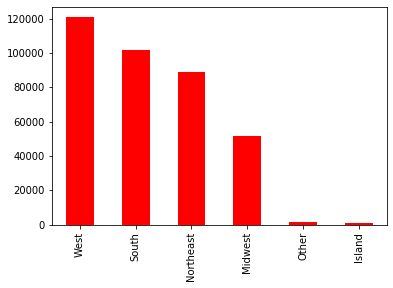

In [64]:
data.employer_region.value_counts().plot(kind='bar',color='red')
plt.show()

In [65]:
data.job_work_state.head()

0    NY
1    NY
2    MD
3    NY
4    NY
Name: job_work_state, dtype: object

In [66]:
us_state_abbrev = {k.upper(): v for k, v in state_abb.items()}
data['job_work_state'].replace(us_state_abbrev, inplace=True)
data.job_work_state = data.job_work_state.astype(str)
data.job_work_state.dtype

dtype('O')

In [67]:
def region(x):
    return regions[x]

data['job_work_state'] = data['job_work_state'].apply(region)


In [68]:
data.sector.isnull().sum()
data.employer_num_employees.isnull().sum()

135349

#### Creating a new level for missing values 

In [69]:
data.sector.fillna("Unavailable",inplace=True)


In [70]:
data.sector.value_counts(1)

Unavailable              0.646995
IT                       0.143909
Advanced Mfg             0.051279
Other Economic Sector    0.043208
Finance                  0.025228
Educational Services     0.024971
Health Care              0.018667
Retail                   0.012056
Aerospace                0.011394
Hospitality              0.005268
Construction             0.003854
Automotive               0.003181
Energy                   0.002970
Transportation           0.002596
Agribusiness             0.002568
Biotechnology            0.001247
Geospatial               0.000386
Homeland Security        0.000224
Name: sector, dtype: float64

In [71]:
data.employer_num_employees.describe()

count    2.302780e+05
mean     2.327626e+04
std      5.555383e+05
min      0.000000e+00
25%      6.800000e+01
50%      1.078000e+03
75%      1.480000e+04
max      2.635506e+08
Name: employer_num_employees, dtype: float64

### Binning the number of employees to depict the size of the enterprise.

In [72]:
pd.qcut(data.employer_num_employees,q=[0.25,0.5,0.75])

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
8                       NaN
9                       NaN
10                      NaN
11                      NaN
12                      NaN
13                      NaN
14                      NaN
15                      NaN
16                      NaN
17                      NaN
18                      NaN
19                      NaN
20                      NaN
21                      NaN
22                      NaN
23                      NaN
24                      NaN
25                      NaN
26                      NaN
27                      NaN
28                      NaN
29                      NaN
                ...        
374332                  NaN
374333    (1078.0, 14800.0]
374334                  NaN
374335    (1078.0, 14800.0]
374336     (67.999, 

#### Creating a new level for missing values by first imputing it to 0 .

In [73]:
data.employer_num_employees.isnull().sum()
data.employer_num_employees.fillna(0,inplace=True)

## LLC has very less employess as .A limited liability company (LLC) is a business entity that combines the limited liability protection of a business corporation with the flexible tax and organizational structure of a partnership.Because LLC have features of both corporations and partnerships, it is called a “hybrid” entity.

In [74]:
def emp(x):
    if x==0:
        return "Unvailable"
    elif x<68 and x>0 :
        return "Small"
    elif x<14800 and x>1078:
        return "Medium"
    else:
        return "Large"
    
data['Enterprise_Size']=data.employer_num_employees.apply(emp)


In [75]:
data['Enterprise_Size'].value_counts()

Unvailable    135607
Large         115284
Medium         57512
Small          57224
Name: Enterprise_Size, dtype: int64

In [76]:
data.employer_num_employees.isnull().sum()

0

In [77]:
data.Enterprise_Size.value_counts()

Unvailable    135607
Large         115284
Medium         57512
Small          57224
Name: Enterprise_Size, dtype: int64

In [78]:
135349/3

45116.333333333336

In [79]:
45116*3

135348

In [80]:
data.Enterprise_Size.value_counts()

Unvailable    135607
Large         115284
Medium         57512
Small          57224
Name: Enterprise_Size, dtype: int64

In [81]:
data.isnull().sum()[data.isnull().sum()!=0]

agent_state                      161157
case_no                          230358
case_received_date               135271
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
level                             27095
wage_unit_of_pay                 115689
dtype: int64

In [82]:
135308/7

19329.714285714286

In [83]:
19329*7

135303

In [84]:
print(data.foreign_worker_info_education.unique())
print(data.foreign_worker_info_education.isnull().sum())

[nan "Bachelor's" 'None' 'Doctorate' "Master's" 'Other' 'High School'
 "Associate's"]
135308


In [85]:
19329*7

135303

In [86]:
## 135308 are null in which 7 unique categories are there so filled with prior category for increase ranging as no other info type of educaton will come rather than given so we can not do new level creation 

data.foreign_worker_info_education.fillna("Bachelor's", limit=19329,inplace=True)  
data.foreign_worker_info_education.fillna("None", limit=19329,inplace=True)
data.foreign_worker_info_education.fillna("Doctorate", limit=19329,inplace=True)
data.foreign_worker_info_education.fillna("Master's", limit=19329,inplace=True)
data.foreign_worker_info_education.fillna("Other", limit=19329,inplace=True)
data.foreign_worker_info_education.fillna("High School", limit=19329,inplace=True)
data.foreign_worker_info_education.fillna("Associate's", limit=19329,inplace=True)
data.foreign_worker_info_education.fillna("Master's",inplace=True)         ## 5 values filled with mode


In [87]:
data.foreign_worker_info_education.isnull().sum()

0

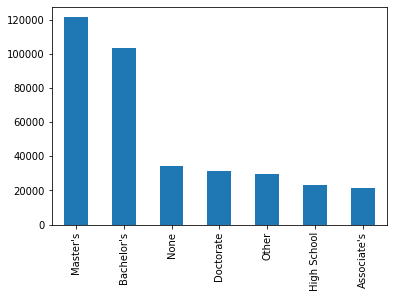

In [88]:
data.foreign_worker_info_education.value_counts().plot(kind='bar')
plt.show()

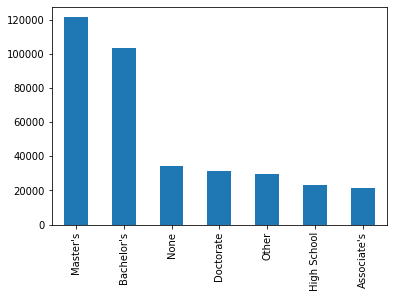

In [89]:
data.foreign_worker_info_education.value_counts().plot(kind='bar')
plt.show()

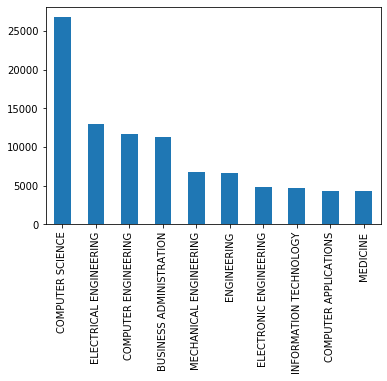

In [90]:
data.foreign_worker_info_major.value_counts().head(10).plot(kind='bar')
plt.show()

In [91]:
data.foreign_worker_info_major.nunique()

21851

#### We have 21k+ unique values here. They are a huge range of the employees details and has redundancy as well.

In [92]:
print(data.job_experience.value_counts(1))
data.job_experience.isnull().sum()

Y    0.558091
N    0.441909
Name: job_experience, dtype: float64


135281

In [93]:
data.job_experience.fillna('not relavant experience',inplace=True) #### Creating a new level for missing values 

In [94]:
data.isnull().sum()[data.isnull().sum()>0]

agent_state                  161157
case_no                      230358
case_received_date           135271
foreign_worker_info_major    151662
job_title                    135313
job_training                 135284
level                         27095
wage_unit_of_pay             115689
dtype: int64

In [95]:
data.job_title.value_counts(1)   ## 59k unique values

Software Engineer                                                                               0.063092
Senior Software Engineer                                                                        0.016981
Computer Systems Analyst - V                                                                    0.013134
Software Developer                                                                              0.012974
Computer Systems Analyst - II                                                                   0.011827
Assistant Professor                                                                             0.011597
Programmer Analyst                                                                              0.011376
Systems Analyst                                                                                 0.008953
Computer Systems Analyst - IV                                                                   0.007603
Software Development Engineer II                       

In [96]:
     ##due to a lot of unique values and info already collected from sector column

In [97]:
data.job_training.fillna('non relavant training',inplace=True)  #### Creating a new level for missing values 

In [98]:
   ### It is the same as pv_unit_of_pay and we already got info by mean salary

In [99]:
data.isnull().sum()[data.isnull().sum()!=0]

agent_state                  161157
case_no                      230358
case_received_date           135271
foreign_worker_info_major    151662
job_title                    135313
level                         27095
wage_unit_of_pay             115689
dtype: int64

In [100]:
data.level.unique()

array(['Level II', 'Level I', 'Level IV', 'Level III', nan], dtype=object)

In [101]:
6773*4

27092

In [102]:
##27095 are null value in which 4 are unique levels and no further different level will come under supervision so we decided to fill null by that prior levles

## 27095/ 4 ==6773 and 4

data.level.fillna("Level I", limit=6773,inplace=True)  
data.level.fillna("Level II", limit=6773,inplace=True)
data.level.fillna("Level III", limit=6773,inplace=True)
data.level.fillna("Level IV", limit=6773,inplace=True)

## filling 7% missing values

In [103]:
data.level.fillna("Level II",inplace=True)  ### rest 3 by mode



In [104]:
data.level.isnull().sum()

0

#### The unknown level of job has the highest salary!

#### Visualizing the columns

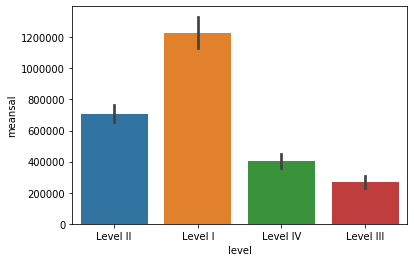

In [105]:
sns.barplot(data.level,data.meansal)
plt.show()

### Level 2 has highest salary

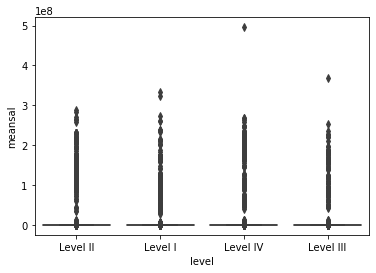

In [106]:
sns.boxplot(data.level,data.meansal)
plt.show()

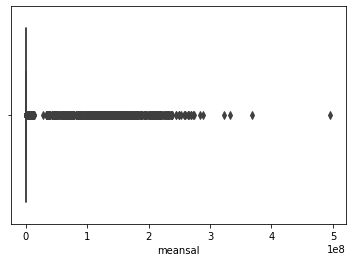

In [107]:
sns.boxplot(data.meansal)
plt.show()

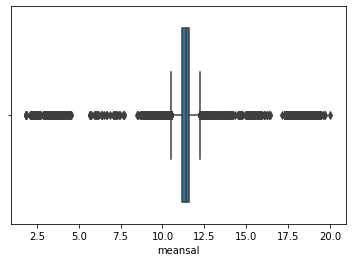

In [108]:
sns.boxplot(np.log(data.meansal))
plt.show()

#### We have many outliers in the meansal column.

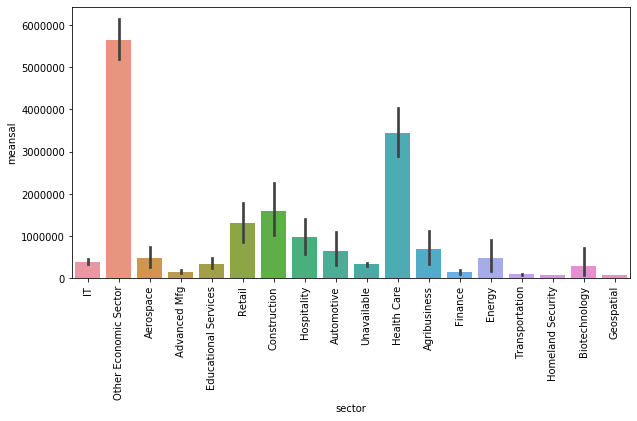

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(data.sector,data.meansal)
plt.xticks(rotation=90)
plt.show()

### Economic Sector and Healthcare have highest salaries in terms of sector

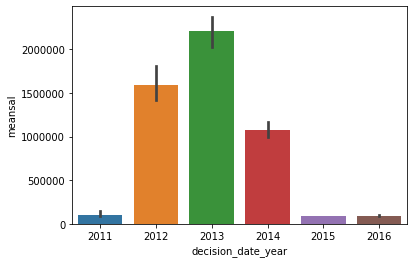

In [110]:
sns.barplot(data.decision_date_year,data.meansal)
plt.show()

### In year 2012 and 2013 , employees had highest wages

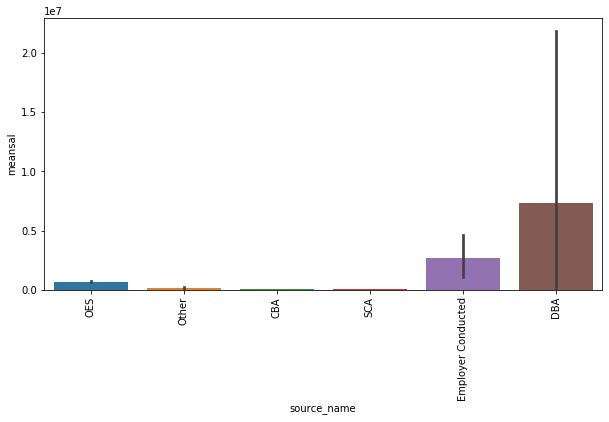

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(data.source_name,data.meansal)
plt.xticks(rotation=90)
plt.show()

### Applications with source_name DBA have highest salary

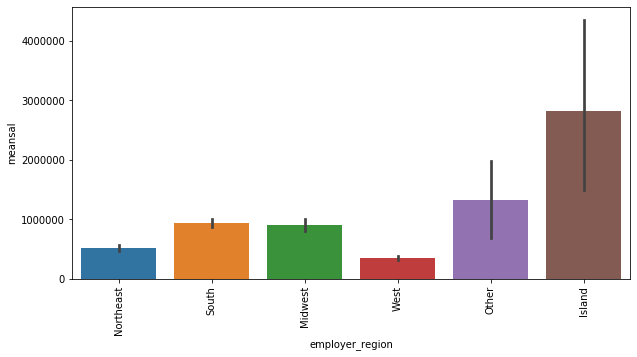

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(data.employer_region,data.meansal)
plt.xticks(rotation=90)
plt.show()

In [113]:
data.drop('employer_num_employees',axis=1,inplace=True)
data.columns

Index(['agent_state', 'application_type', 'case_no', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       'decision_date', 'employer_yr_estab', 'employer_city', 'employer_name',
       'employer_state', 'foreign_worker_info_education',
       'foreign_worker_info_major', 'job_experience', 'job_title',
       'job_training', 'job_work_state', 'pv_unit_of_pay_9089',
       'previous_salary', 'level', 'source_name', 'sector', 'wage_offer',
       'wage_unit_of_pay', 'case_received_date_year', 'decision_date_year',
       'Received_Year', 'meansal', 'employer_region', 'Enterprise_Size'],
      dtype='object')

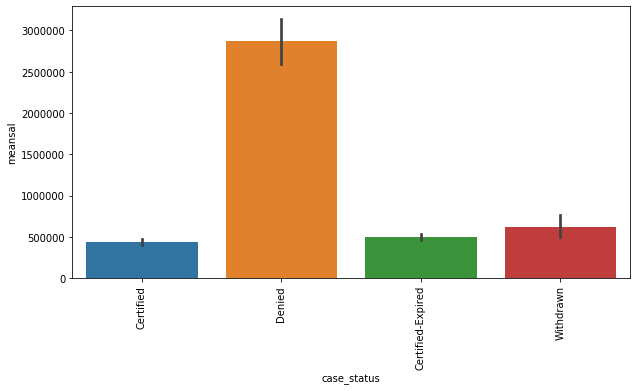

In [114]:
plt.figure(figsize=(10,5))
sns.barplot(data.case_status,data.meansal)
plt.xticks(rotation=90)
plt.show()

### Applicants with very high salary in their own country were denied the most for visa

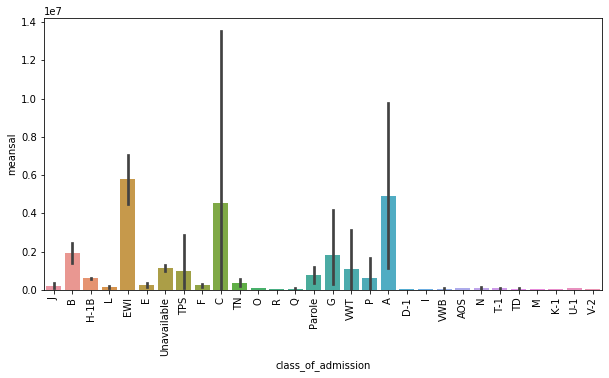

In [115]:
plt.figure(figsize=(10,5))
sns.barplot(data.class_of_admission,data.meansal)
plt.xticks(rotation=90)
plt.show()

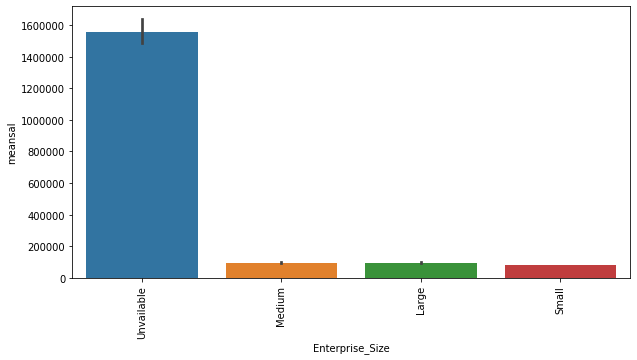

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(data.Enterprise_Size,data.meansal)
plt.xticks(rotation=90)
plt.show()

### It has no effect on salary

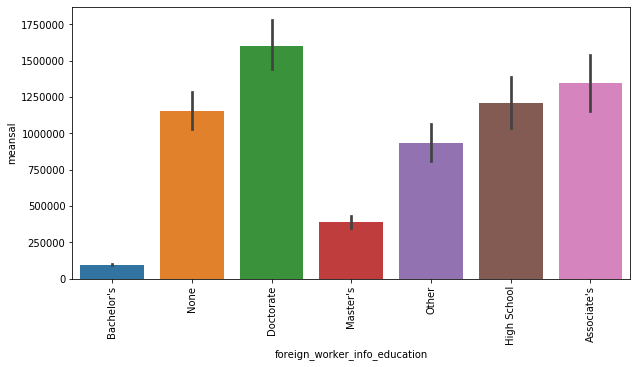

In [117]:
plt.figure(figsize=(10,5))
sns.barplot(data.foreign_worker_info_education,data.meansal)
plt.xticks(rotation=90)
plt.show()

In [118]:
pd.crosstab(data.case_status,data.source_name)

source_name,CBA,DBA,Employer Conducted,OES,Other,SCA
case_status,,,,,,
Certified,1472,0,117,163531,12866,14
Certified-Expired,1285,0,94,133152,10327,8
Denied,629,24,296,22846,1229,45
Withdrawn,198,0,26,16403,1057,8


In [119]:
data.head()

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year,meansal,employer_region,Enterprise_Size
0,NaN,PERM,A-07323-97014,NaT,Certified,J,ARMENIA,2012-02-01,Unavailable,NEW YORK,NETSOFT USA INC.,NY,Bachelor's,NaN,not relavant experience,NaN,non relavant training,Northeast,Year,75629.0,Level II,OES,IT,75629.00,Year,2007,2012,2007,75629.000,Northeast,Unvailable
1,NaN,PERM,A-07332-99439,NaT,Denied,B,POLAND,2011-12-21,Unavailable,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,Bachelor's,NaN,not relavant experience,NaN,non relavant training,Northeast,Year,37024.0,Level I,OES,Other Economic Sector,37024.00,Year,2007,2011,2007,37024.000,Northeast,Unvailable
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,Unavailable,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,Bachelor's,NaN,not relavant experience,NaN,non relavant training,South,Year,47923.0,Level I,OES,Aerospace,47923.00,Year,2007,2011,2007,47923.000,South,Unvailable
3,NaN,PERM,A-07339-01930,NaT,Certified,B,SOUTH KOREA,2011-12-01,Unavailable,FLUSHING,EBENEZER MISSION CHURCH,NY,Bachelor's,NaN,not relavant experience,NaN,non relavant training,Northeast,Year,21940.0,Level II,OES,Other Economic Sector,10.97,Hour,2007,2011,2007,10975.485,Northeast,Unvailable
4,NaN,PERM,A-07345-03565,NaT,Certified,L,CANADA,2012-01-26,Unavailable,ALBANY,ALBANY INTERNATIONAL CORP.,NY,Bachelor's,NaN,not relavant experience,NaN,non relavant training,Northeast,Year,94890.0,Level IV,OES,Advanced Mfg,100000.00,Year,2007,2012,2007,97445.000,Northeast,Unvailable


In [120]:
pd.crosstab(data.case_status,data.class_of_admission)

class_of_admission,A,AOS,B,C,D-1,E,EWI,F,G,H-1B,I,J,K-1,L,M,N,O,P,Parole,Q,R,T-1,TD,TN,TPS,U-1,Unavailable,V-2,VWB,VWT
case_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Certified,66,2,1529,17,1,2688,507,7780,84,137853,37,539,0,10147,15,1,417,100,1053,2,56,1,9,2193,93,0,12786,1,5,18
Certified-Expired,52,1,1076,10,2,1928,547,5440,65,115167,29,339,0,8687,6,2,304,76,1278,2,38,2,2,1681,55,2,8057,0,3,15
Denied,31,0,1144,17,3,665,807,1551,23,14664,11,113,1,588,6,1,69,54,177,1,13,1,1,192,30,0,4879,1,2,24
Withdrawn,6,0,198,3,0,370,76,1019,11,12603,5,63,1,664,2,0,46,25,176,0,12,0,3,195,9,0,2204,0,0,1


In [121]:
pd.crosstab(data.case_status,data.employer_yr_estab)

employer_yr_estab,Ancient,New,Old,Unavailable
case_status,,,,
Certified,38234,43221,35574,60971
Certified-Expired,30604,31358,29884,53020
Denied,4106,5210,2762,12991
Withdrawn,3042,3807,2421,8422


In [122]:
pd.crosstab(data.case_status,data.employer_city)

employer_city,", NEW YORK",", New York",200 WEST STREET,37-18 QUEENS BLVD,39TH FLOOR,ABBEVILLE,ABBOTSFORD,ABBOTT PARK,ABERDEEN,ABILENE,ABINGTON,ABSECON,ACCIDENT,ACCOKEEK,ACCOMAC,ACTON,ACWORTH,ADA,ADAMS,ADAMSVILLE,ADDISON,ADELANTO,ADELPHI,ADKINS,ADRIAN,...,west lafayette,west palm beach,west warwick,westboro,westminster,westmont,weston,westport,whitestone,whiteville,whitman,williamstown,wilmington,windermere,winston salem,winter garden,winter springs,wixom,woodbridge,woodland hills,woodstock,wynnewood,yardley,yorktown heights,Ã€VENTURA
case_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Certified,0,0,0,1,1,0,126,76,8,6,13,0,0,0,1,41,1,20,1,0,130,0,3,0,2,...,0,0,0,0,1,1,2,0,0,1,0,1,1,0,0,1,1,2,2,1,1,1,0,0,1
Certified-Expired,1,1,0,0,0,1,62,55,11,2,16,0,1,2,2,57,1,11,0,1,130,0,5,1,1,...,1,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
Denied,0,0,0,0,0,0,47,18,3,3,1,1,0,2,0,1,0,1,0,0,20,1,13,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
Withdrawn,0,0,1,0,0,0,78,13,2,0,0,0,0,0,0,2,0,4,0,0,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [123]:
data.drop('employer_city',axis=1,inplace=True)    # 8.3k unique vales

In [124]:
pd.crosstab(data.case_status,data.foreign_worker_info_education)

foreign_worker_info_education,Associate's,Bachelor's,Doctorate,High School,Master's,None,Other
case_status,,,,,,,
Certified,7632,54469,16767,12999,59380,10875,15878
Certified-Expired,5149,39273,11810,9356,47604,19202,12472
Denied,4764,6056,2496,885,7589,2652,627
Withdrawn,4113,3849,483,233,6817,1771,426


In [125]:
pd.crosstab(data.case_status,data.employer_region)

employer_region,Island,Midwest,Northeast,Other,South,West
case_status,,,,,,
Certified,300,25579,43313,706,48697,59405
Certified-Expired,185,19959,35655,663,39108,49296
Denied,149,3312,5956,188,8920,6544
Withdrawn,29,2677,4102,83,5273,5528


In [126]:
pd.crosstab(data.case_status,data.job_experience)

job_experience,N,Y,not relavant experience
case_status,,,
Certified,51676,65359,60965
Certified-Expired,38715,53134,53017
Denied,6312,5881,12876
Withdrawn,5089,4180,8423


In [127]:
pd.crosstab(data.case_status,data.job_training)

job_training,N,Y,non relavant training
case_status,,,
Certified,115231,1804,60965
Certified-Expired,90124,1726,53016
Denied,11581,608,12880
Withdrawn,9085,184,8423


In [128]:
pd.crosstab(data.case_status,data.job_work_state)

job_work_state,Island,Midwest,Northeast,Other,South,West
case_status,,,,,,
Certified,313,25047,41959,828,51066,58787
Certified-Expired,206,19820,34831,720,40847,48442
Denied,151,3269,6142,204,8329,6974
Withdrawn,29,2549,4147,85,5391,5491


In [129]:
pd.crosstab(data.case_status,data.sector)

sector,Advanced Mfg,Aerospace,Agribusiness,Automotive,Biotechnology,Construction,Educational Services,Energy,Finance,Geospatial,Health Care,Homeland Security,Hospitality,IT,Other Economic Sector,Retail,Transportation,Unavailable
case_status,,,,,,,,,,,,,,,,,,
Certified,9091,1945,317,459,215,476,4031,536,4494,72,3281,28,637,23840,6939,2254,429,118956
Certified-Expired,7414,1729,225,474,209,475,3593,441,3795,57,2561,36,555,21436,6126,1645,368,93727
Denied,1096,243,242,151,12,364,937,44,397,8,565,14,575,4035,1597,309,96,14384
Withdrawn,1148,249,155,79,20,94,569,65,538,4,418,4,159,3306,1136,200,56,9492


In [130]:
pd.crosstab(data.case_status,data.source_name)

source_name,CBA,DBA,Employer Conducted,OES,Other,SCA
case_status,,,,,,
Certified,1472,0,117,163531,12866,14
Certified-Expired,1285,0,94,133152,10327,8
Denied,629,24,296,22846,1229,45
Withdrawn,198,0,26,16403,1057,8


In [131]:
data.shape

(365627, 30)

### Exporting Clean Data

In [132]:
data.employer_name.nunique()

71709

In [133]:
data.drop(['country_of_citizenship','employer_name'],axis=1,inplace=True)

In [134]:
data.head()

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,decision_date,employer_yr_estab,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year,Received_Year,meansal,employer_region,Enterprise_Size
0,NaN,PERM,A-07323-97014,NaT,Certified,J,2012-02-01,Unavailable,NY,Bachelor's,NaN,not relavant experience,NaN,non relavant training,Northeast,Year,75629.0,Level II,OES,IT,75629.00,Year,2007,2012,2007,75629.000,Northeast,Unvailable
1,NaN,PERM,A-07332-99439,NaT,Denied,B,2011-12-21,Unavailable,NY,Bachelor's,NaN,not relavant experience,NaN,non relavant training,Northeast,Year,37024.0,Level I,OES,Other Economic Sector,37024.00,Year,2007,2011,2007,37024.000,Northeast,Unvailable
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,2011-12-01,Unavailable,VA,Bachelor's,NaN,not relavant experience,NaN,non relavant training,South,Year,47923.0,Level I,OES,Aerospace,47923.00,Year,2007,2011,2007,47923.000,South,Unvailable
3,NaN,PERM,A-07339-01930,NaT,Certified,B,2011-12-01,Unavailable,NY,Bachelor's,NaN,not relavant experience,NaN,non relavant training,Northeast,Year,21940.0,Level II,OES,Other Economic Sector,10.97,Hour,2007,2011,2007,10975.485,Northeast,Unvailable
4,NaN,PERM,A-07345-03565,NaT,Certified,L,2012-01-26,Unavailable,NY,Bachelor's,NaN,not relavant experience,NaN,non relavant training,Northeast,Year,94890.0,Level IV,OES,Advanced Mfg,100000.00,Year,2007,2012,2007,97445.000,Northeast,Unvailable


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365627 entries, 0 to 374361
Data columns (total 28 columns):
agent_state                      204470 non-null object
application_type                 365627 non-null object
case_no                          135269 non-null object
case_received_date               230356 non-null datetime64[ns]
case_status                      365627 non-null object
class_of_admission               365627 non-null object
decision_date                    365627 non-null datetime64[ns]
employer_yr_estab                365627 non-null object
employer_state                   365627 non-null object
foreign_worker_info_education    365627 non-null object
foreign_worker_info_major        213965 non-null object
job_experience                   365627 non-null object
job_title                        230314 non-null object
job_training                     365627 non-null object
job_work_state                   365627 non-null object
pv_unit_of_pay_9089              

### Data Preprocessing:-

In [136]:
data.isnull().sum()[data.isnull().sum()!=0]

agent_state                  161157
case_no                      230358
case_received_date           135271
foreign_worker_info_major    151662
job_title                    135313
wage_unit_of_pay             115689
dtype: int64

In [137]:
data.columns

Index(['agent_state', 'application_type', 'case_no', 'case_received_date',
       'case_status', 'class_of_admission', 'decision_date',
       'employer_yr_estab', 'employer_state', 'foreign_worker_info_education',
       'foreign_worker_info_major', 'job_experience', 'job_title',
       'job_training', 'job_work_state', 'pv_unit_of_pay_9089',
       'previous_salary', 'level', 'source_name', 'sector', 'wage_offer',
       'wage_unit_of_pay', 'case_received_date_year', 'decision_date_year',
       'Received_Year', 'meansal', 'employer_region', 'Enterprise_Size'],
      dtype='object')

In [138]:
data.drop(columns=['agent_state','case_no','case_received_date','foreign_worker_info_major','job_title','wage_unit_of_pay'],inplace=True)

In [139]:
data.shape

(365627, 22)

In [140]:


#data.drop('foreign_worker_info_major',axis=1,inplace=True)
data.drop('employer_state',axis=1,inplace=True)

data.drop(['Received_Year','decision_date'],axis=1,inplace=True)
#data.drop('agent_state',axis=1,inplace=True)
#data.drop(['case_no','previous_salary','wage_offer'],axis=1,inplace=True)
#data.drop('job_title',axis=1,inplace=True)
#data.drop('wage_unit_of_pay',axis=1,inplace=True)

In [141]:
data.columns

Index(['application_type', 'case_status', 'class_of_admission',
       'employer_yr_estab', 'foreign_worker_info_education', 'job_experience',
       'job_training', 'job_work_state', 'pv_unit_of_pay_9089',
       'previous_salary', 'level', 'source_name', 'sector', 'wage_offer',
       'case_received_date_year', 'decision_date_year', 'meansal',
       'employer_region', 'Enterprise_Size'],
      dtype='object')

### Base Model

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()

In [143]:
def target(x):
    if x=="Certified":
        return 0
    elif x=="Certified-Expired":
        return 1
    elif x=='Denied':
        return 2
    else:
        return 3
data.case_status=data.case_status.apply(target)

In [144]:
dummy=pd.get_dummies(data)

In [145]:
dummy.head()

,case_status,previous_salary,wage_offer,case_received_date_year,decision_date_year,meansal,application_type_MAILEDIN,application_type_ONLINE,application_type_PERM,class_of_admission_A,class_of_admission_AOS,class_of_admission_B,class_of_admission_C,class_of_admission_D-1,class_of_admission_E,class_of_admission_EWI,class_of_admission_F,class_of_admission_G,class_of_admission_H-1B,class_of_admission_I,class_of_admission_J,class_of_admission_K-1,class_of_admission_L,class_of_admission_M,class_of_admission_N,...,sector_Automotive,sector_Biotechnology,sector_Construction,sector_Educational Services,sector_Energy,sector_Finance,sector_Geospatial,sector_Health Care,sector_Homeland Security,sector_Hospitality,sector_IT,sector_Other Economic Sector,sector_Retail,sector_Transportation,sector_Unavailable,employer_region_Island,employer_region_Midwest,employer_region_Northeast,employer_region_Other,employer_region_South,employer_region_West,Enterprise_Size_Large,Enterprise_Size_Medium,Enterprise_Size_Small,Enterprise_Size_Unvailable
0,0,75629.0,75629.00,2007,2012,75629.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,37024.0,37024.00,2007,2011,37024.000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,47923.0,47923.00,2007,2011,47923.000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,21940.0,10.97,2007,2011,10975.485,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,94890.0,100000.00,2007,2012,97445.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [146]:
x=dummy.drop('case_status',axis=1)
y=dummy['case_status']

In [147]:
x.head()

,previous_salary,wage_offer,case_received_date_year,decision_date_year,meansal,application_type_MAILEDIN,application_type_ONLINE,application_type_PERM,class_of_admission_A,class_of_admission_AOS,class_of_admission_B,class_of_admission_C,class_of_admission_D-1,class_of_admission_E,class_of_admission_EWI,class_of_admission_F,class_of_admission_G,class_of_admission_H-1B,class_of_admission_I,class_of_admission_J,class_of_admission_K-1,class_of_admission_L,class_of_admission_M,class_of_admission_N,class_of_admission_O,...,sector_Automotive,sector_Biotechnology,sector_Construction,sector_Educational Services,sector_Energy,sector_Finance,sector_Geospatial,sector_Health Care,sector_Homeland Security,sector_Hospitality,sector_IT,sector_Other Economic Sector,sector_Retail,sector_Transportation,sector_Unavailable,employer_region_Island,employer_region_Midwest,employer_region_Northeast,employer_region_Other,employer_region_South,employer_region_West,Enterprise_Size_Large,Enterprise_Size_Medium,Enterprise_Size_Small,Enterprise_Size_Unvailable
0,75629.0,75629.00,2007,2012,75629.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,37024.0,37024.00,2007,2011,37024.000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,47923.0,47923.00,2007,2011,47923.000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,21940.0,10.97,2007,2011,10975.485,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,94890.0,100000.00,2007,2012,97445.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [148]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123)

In [149]:
scaled_train=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_test=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [151]:
model=rf.fit(scaled_train,ytrain)
ypred=model.predict(scaled_test)

In [152]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix,cohen_kappa_score,matthews_corrcoef,accuracy_score,roc_auc_score

In [153]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     35675
           1       0.76      0.82      0.79     28710
           2       0.69      0.50      0.58      5128
           3       0.51      0.30      0.38      3613

    accuracy                           0.77     73126
   macro avg       0.69      0.61      0.64     73126
weighted avg       0.76      0.77      0.76     73126



In [154]:
accuracy_score(ytest,ypred)

0.7693159751661516

In [155]:
cohen_kappa_score(ytest,ypred)

0.606658852810517

In [156]:
matthews_corrcoef(ytest,ypred)

0.6078247097534819

In [157]:
from sklearn.model_selection import KFold,cross_val_score

### Selecting top 20 features based upon their importances to make another model

In [158]:
features=pd.DataFrame(model.feature_importances_)

In [159]:
features = pd.DataFrame(model.feature_importances_, index =xtest.columns,columns = ["Features"])

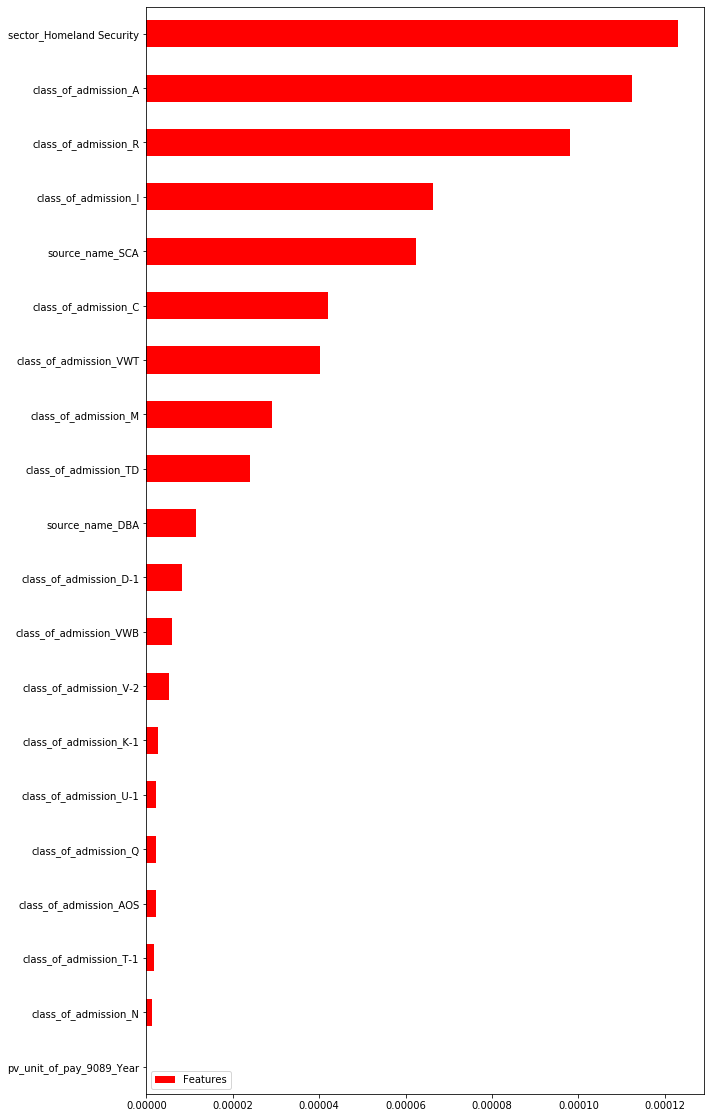

In [160]:
features.sort_values(by= "Features").head(20).plot(kind='barh',color='red',figsize=(10,20))

In [161]:
l=features.head(20)

In [162]:
l

,Features
previous_salary,0.110201
wage_offer,0.113728
case_received_date_year,0.131386
decision_date_year,0.094976
meansal,0.115343
application_type_MAILEDIN,0.078910
application_type_ONLINE,0.025742
application_type_PERM,0.059225
class_of_admission_A,0.000112
class_of_admission_AOS,0.000002


In [163]:
newx=dummy[['class_of_admission_K-1','class_of_admission_J','class_of_admission_I','class_of_admission_H-1B','class_of_admission_G','class_of_admission_F','class_of_admission_EWI','class_of_admission_E','class_of_admission_D-1','class_of_admission_C','class_of_admission_B','class_of_admission_AOS','class_of_admission_A','application_type_Unavailable','application_type_PERM','case_received_date_year','decision_date_year','meansal','application_type_MAILEDIN','application_type_ONLINE']]
newy=dummy['case_status']                 

KeyError: "['application_type_Unavailable'] not in index"

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(newx,newy,test_size=0.2,random_state=123)
scaled_train=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
scaled_test=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [ ]:
model=rf.fit(scaled_train,ytrain)
ypred=model.predict(scaled_test)

In [ ]:
print(classification_report(ytest,ypred))
print("Accuracy = ",accuracy_score(ytest,ypred))
print("CK score = ",cohen_kappa_score(ytest,ypred))

### This model didn't improved the performance. Thus we will go with the original one.

#### Changing the model from muticlass to binary to check performance

In [ ]:
# def target(x):
#     if x=="Certified":
#         return 0
#     elif x=="Certified-Expired":
#         return 1
#     elif x=='Denied':
#         return 2
#     else:
#         return 4
dummy.case_status.replace(1,0,inplace=True)
dummy.case_status.replace(2,1,inplace=True)
dummy.case_status.replace(4,1,inplace=True)

In [ ]:
x=dummy.drop('case_status',axis=1)
y=dummy['case_status']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123)
scaled_train=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_test=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)
model=rf.fit(scaled_train,ytrain)
ypred=model.predict(scaled_test)

In [ ]:
print(classification_report(ytest,ypred))
print("Accuracy = ",accuracy_score(ytest,ypred))
print("CK score = ",cohen_kappa_score(ytest,ypred))